# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Uncomment to download data
#!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
#!unzip traffic-signs-data.zip -d traffic-signs-data

In [2]:
!ls traffic-signs-data/

test.p	train.p  valid.p


In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import cv2
import os
import pandas as pd

In [4]:
sign_names = pd.read_csv('signnames.csv')
sign_names.head()
sign_dict = pd.Series(sign_names.SignName.values, index=sign_names.ClassId).to_dict()
# shorten some strings 
sign_dict[10] = "No passing vehicles>3.5 tons"
sign_dict[11] = "Right-of-way at next inters."
sign_dict[16] = "Vehicles>3.5 tons prohibited"
sign_dict[19] = "Dangerous left curve"
sign_dict[20] = "Dangerous right curve"
sign_dict[32] = "End speed and passing limits"
sign_dict[42] = "End no passing vehicles>3.5 tons"
sign_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing vehicles>3.5 tons',
 11: 'Right-of-way at next inters.',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles>3.5 tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous left curve',
 20: 'Dangerous right curve',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep r

In [5]:

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1
unique, counts = np.unique(y_train, return_counts=True)
assert n_classes == len(counts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [29]:
def plot_figures(figures, nrows = 1, ncols=1, labels=None , supTitle=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 2))
    if supTitle:
        fig.suptitle(supTitle)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            pass; #axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


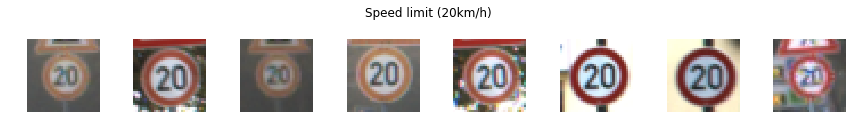

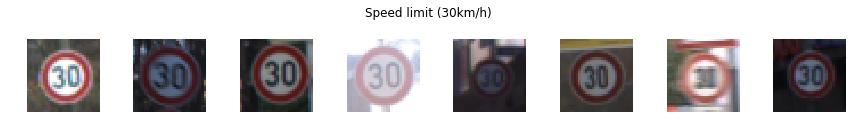

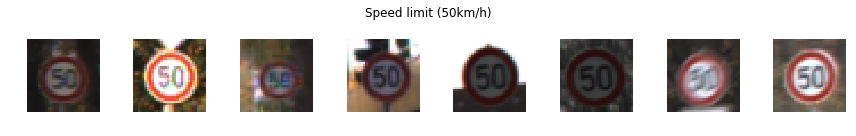

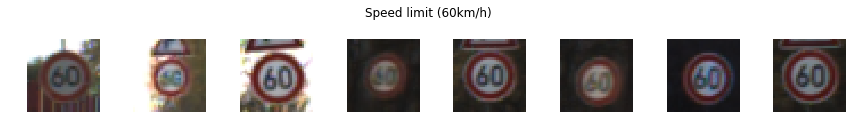

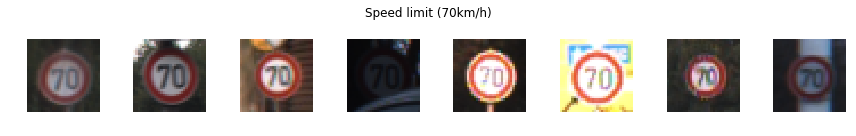

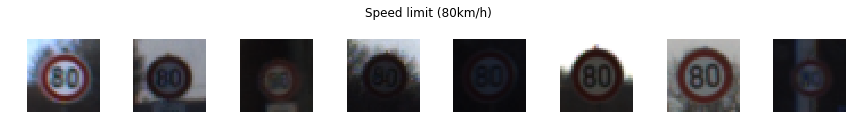

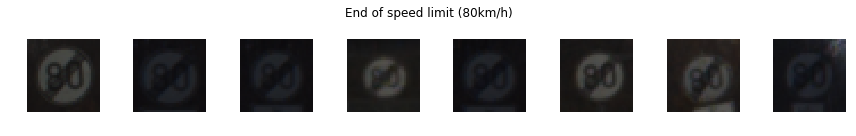

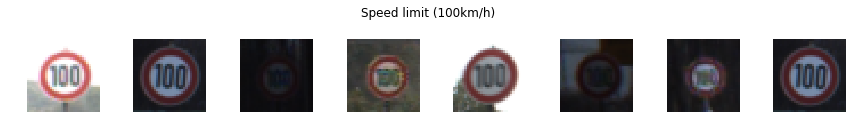

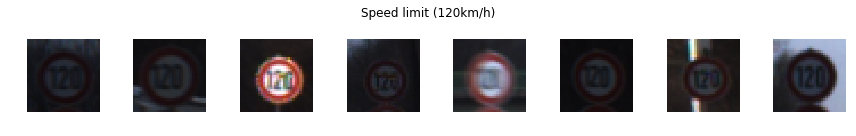

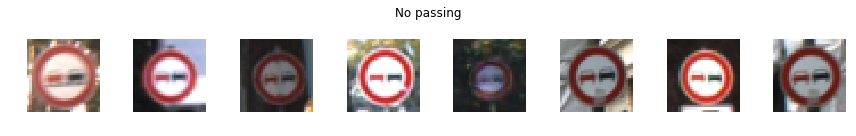

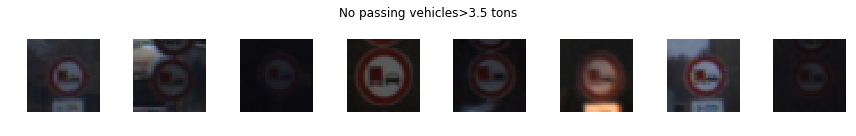

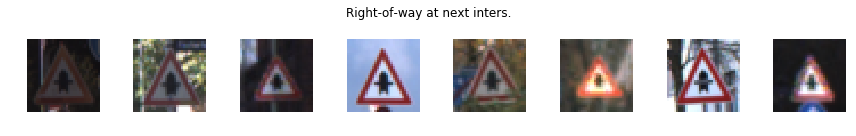

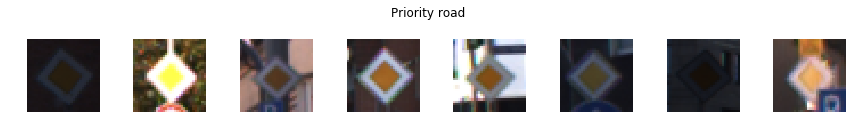

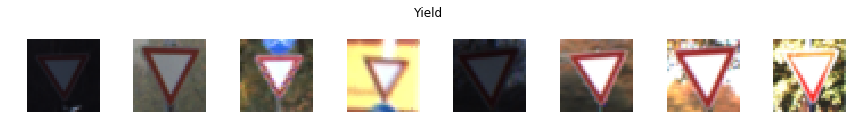

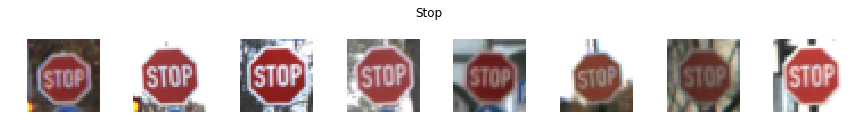

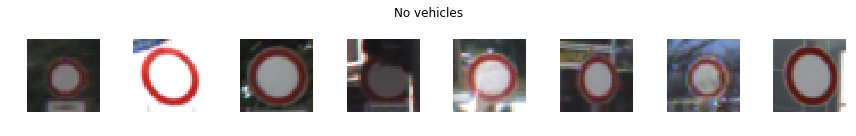

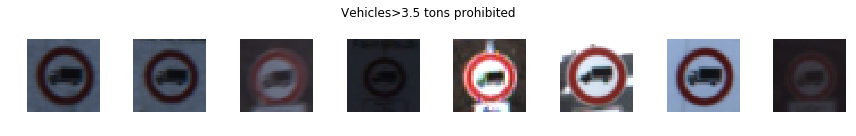

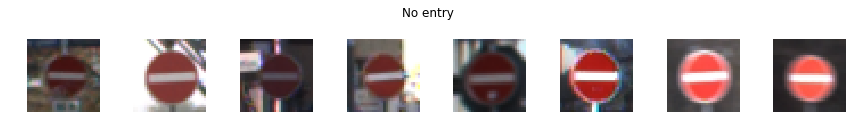

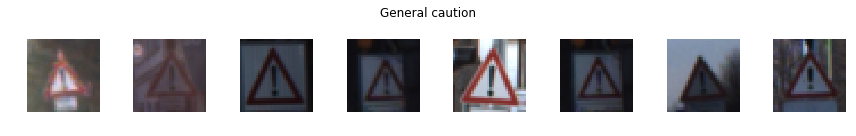

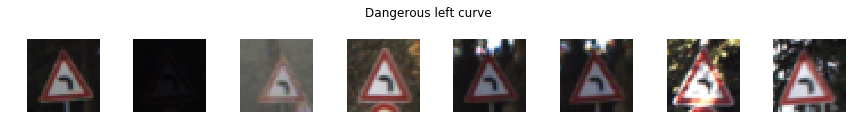

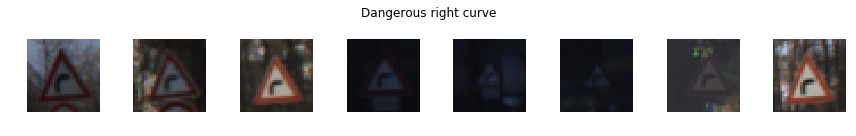

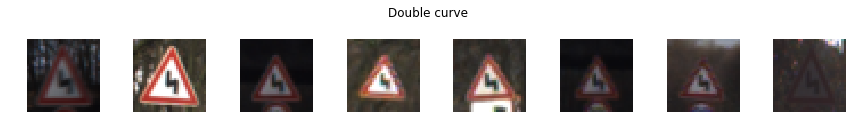

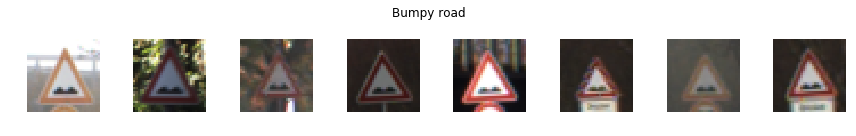

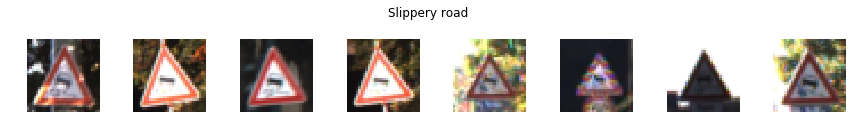

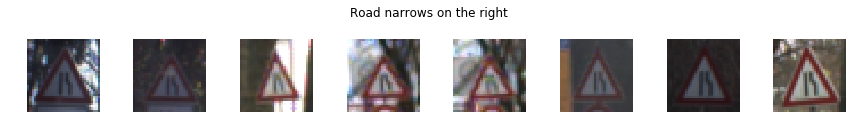

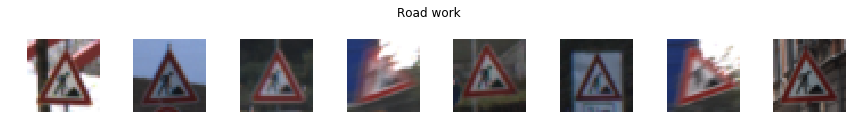

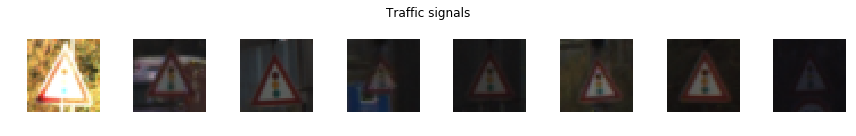

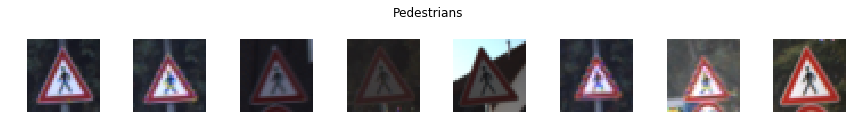

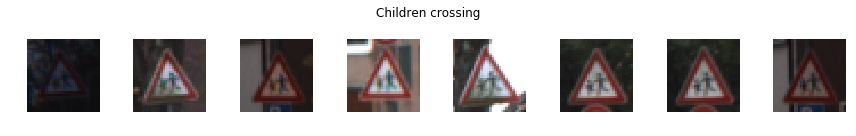

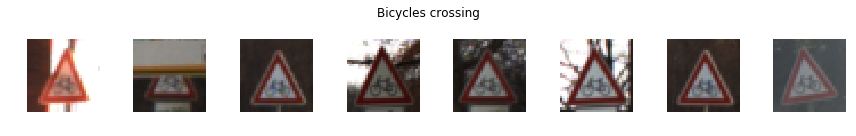

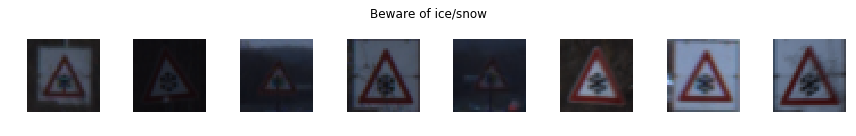

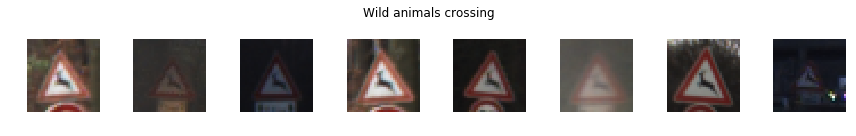

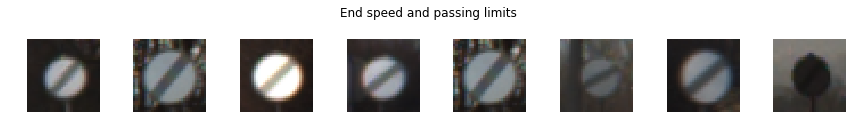

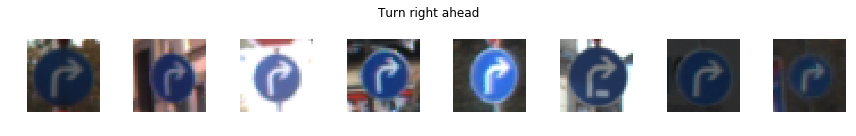

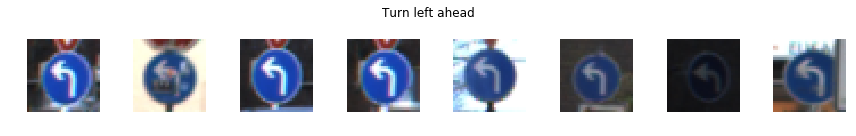

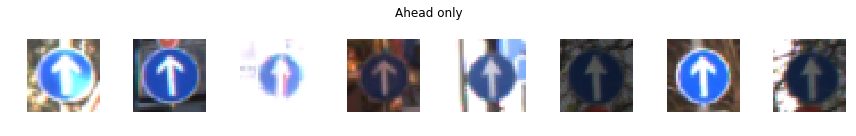

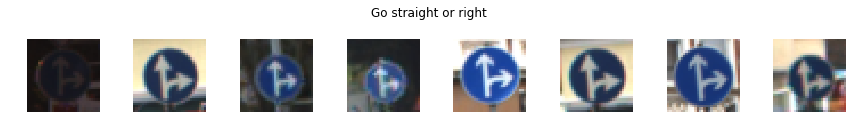

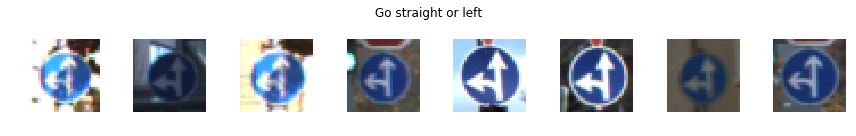

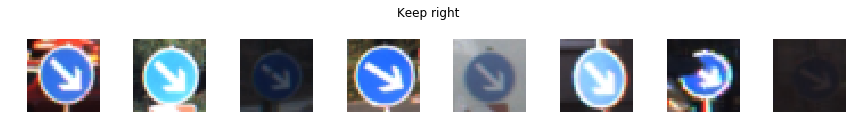

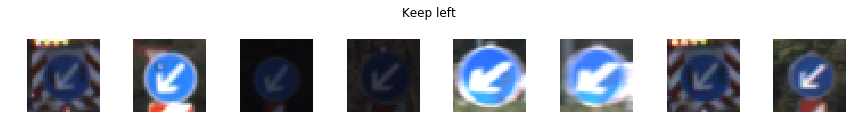

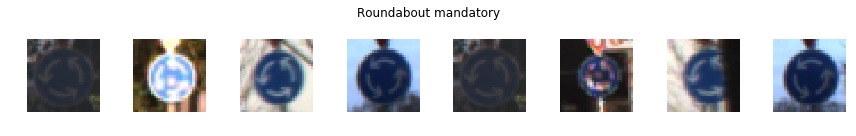

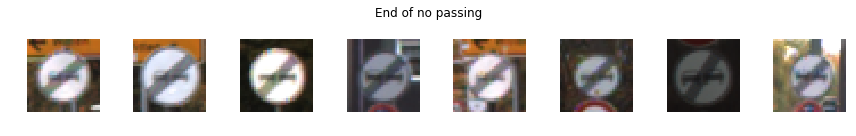

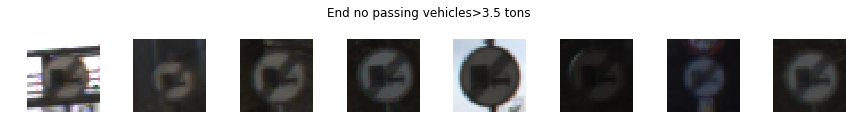

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

plot_per_class = 8
for i in range(n_classes):
    figures = {}
    labels = {}
    class_els = (y_train == i)
    imgs_of_class = X_train[class_els]
    
    for j in range(plot_per_class):
        # choose random figures
        idx = np.random.randint(len(imgs_of_class))
        #labels[j] = '{}'.format(sign_dict[i])
        figures[j] = imgs_of_class[idx].squeeze()
    plot_figures(figures, 1, plot_per_class, supTitle=sign_dict[i])
plt.show()

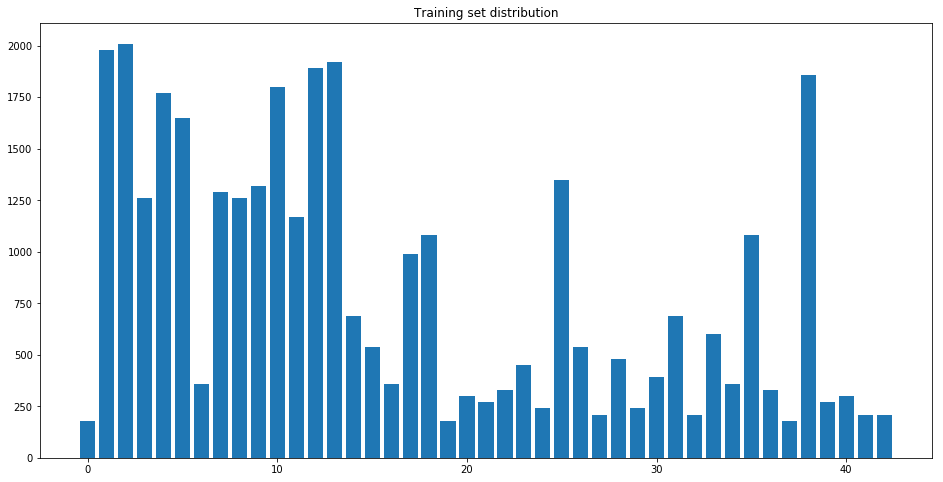

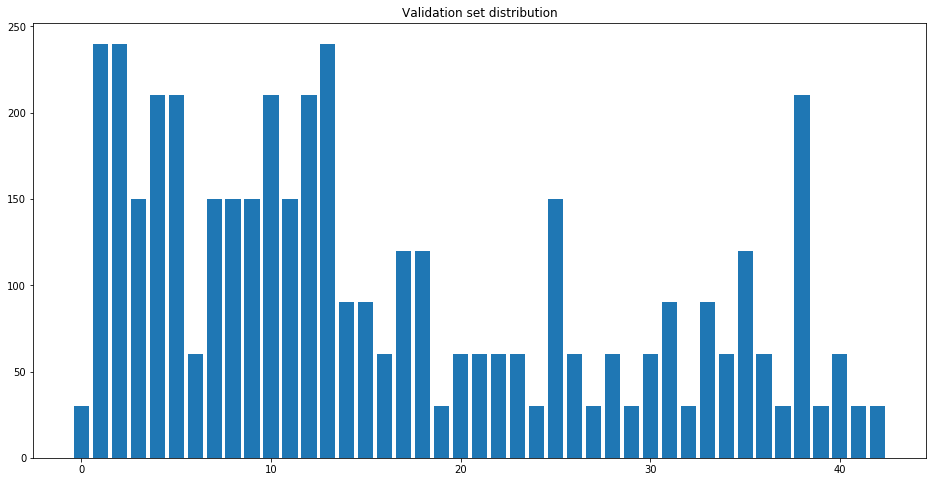

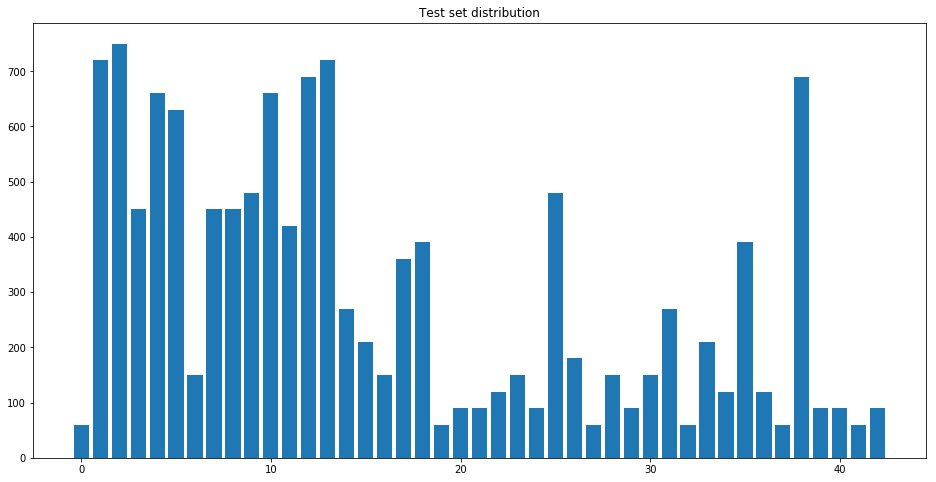

In [8]:
plt.figure(figsize=(16, 8))
unique, counts = np.unique(y_train, return_counts=True)
plt.title("Training set distribution")
plt.bar(range(n_classes), counts)

plt.figure(figsize=(16, 8))
unique, counts = np.unique(y_valid, return_counts=True)
plt.bar(range(n_classes), counts)
plt.title("Validation set distribution")


plt.figure(figsize=(16, 8))
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(range(n_classes), counts)
plt.title("Test set distribution")

plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
def convertTo1Channel(img):
    return np.expand_dims(np.array(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), dtype=np.float32), axis=2)
    
def input_pipeline(X_data):
    offset = 128.
    norm = 128.
    X_res = list()
    for el in X_data:
        X_res.append(convertTo1Channel(el))
    X_res = np.array(X_res)
    X_res = (X_res-offset)/norm
    return X_res
        
X_train_norm = input_pipeline(X_train)
X_val_norm = input_pipeline(X_valid)
X_test_norm = input_pipeline(X_test)
#X_train_norm = cv2.cvtColor(X_train, cv2.COLOR_RGB2GRAY)
n_channels = X_train_norm.shape[-1]

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


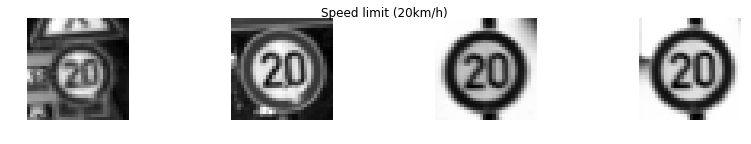

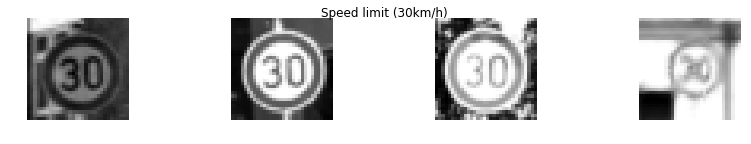

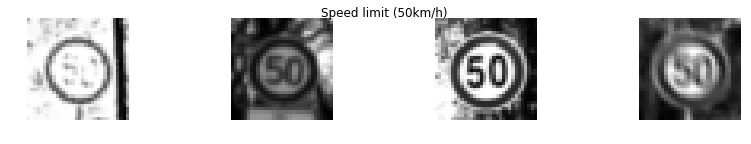

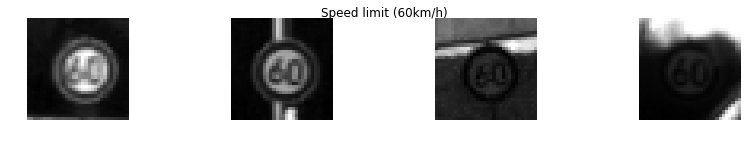

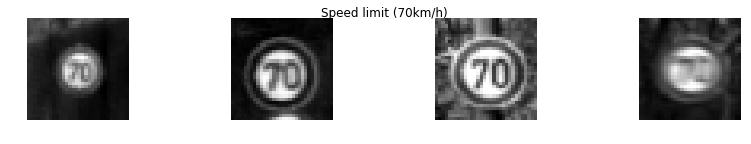

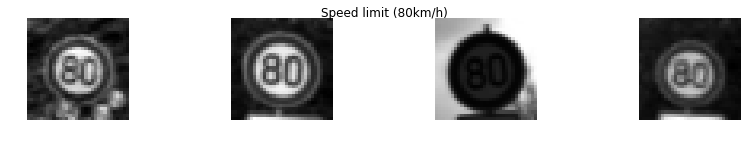

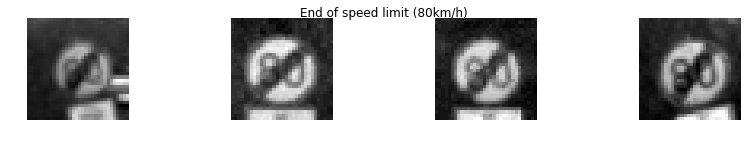

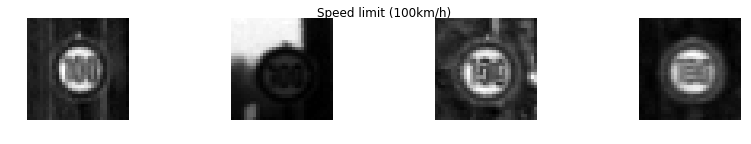

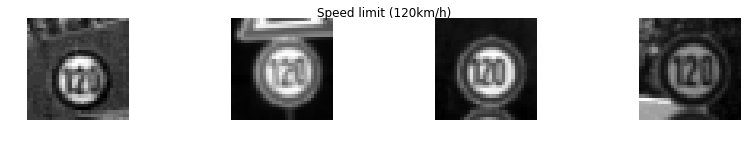

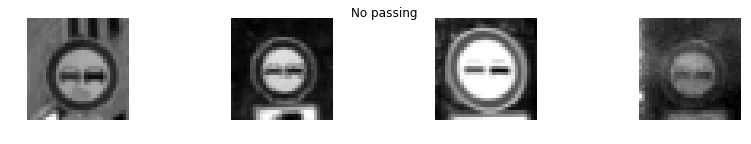

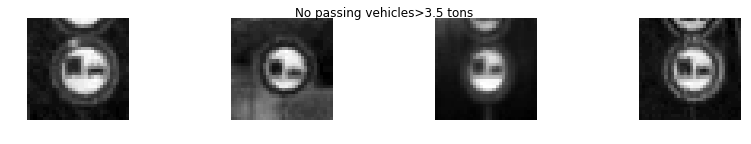

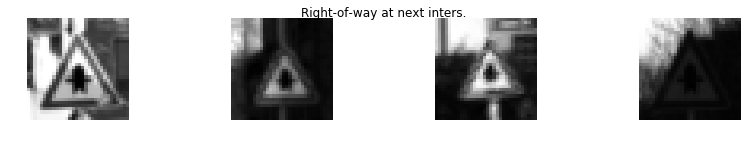

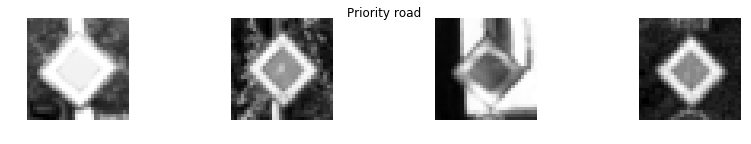

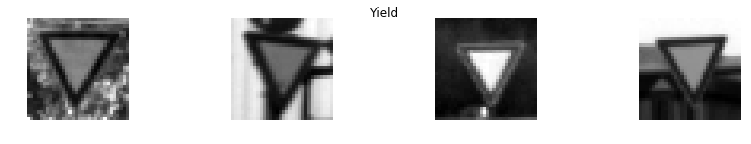

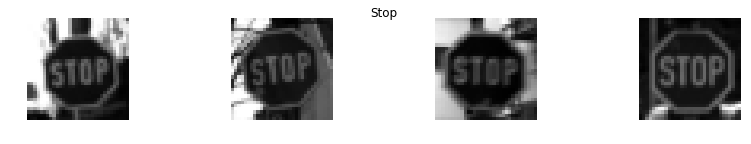

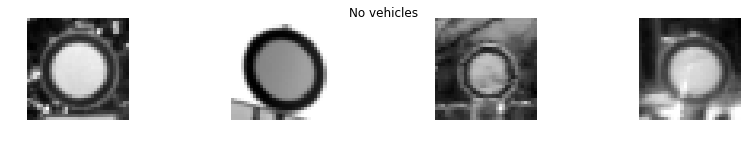

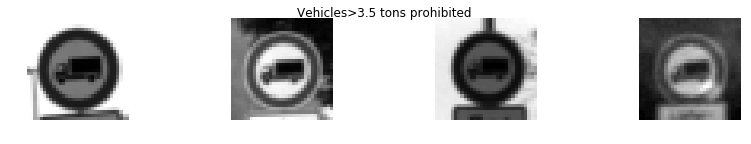

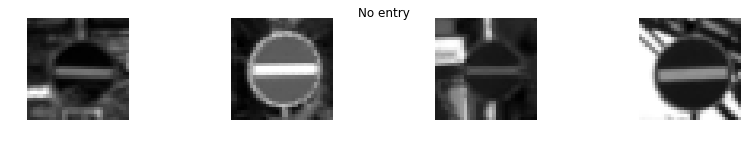

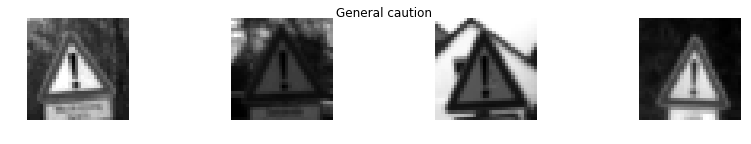

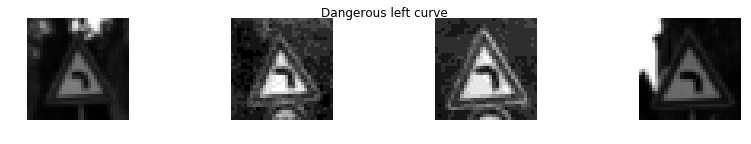

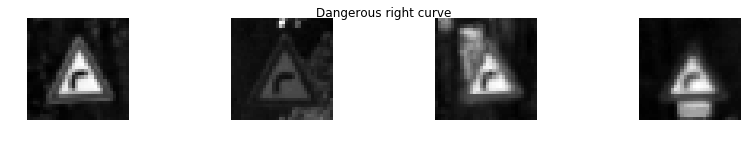

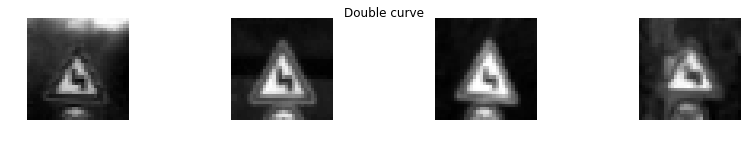

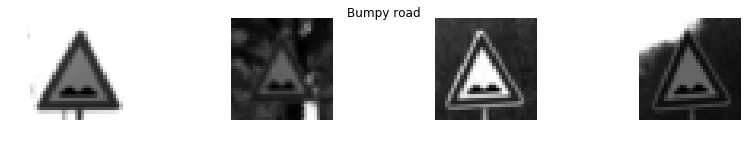

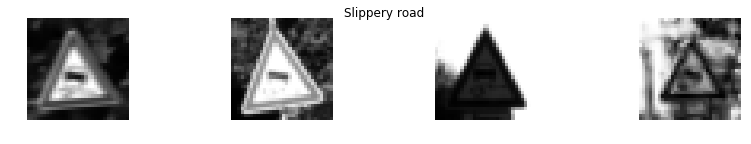

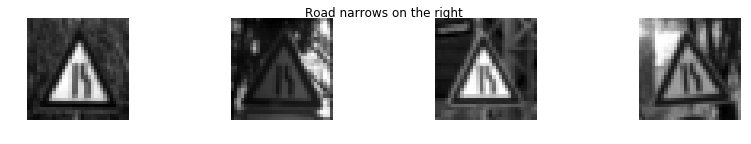

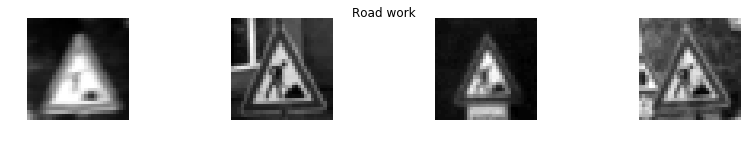

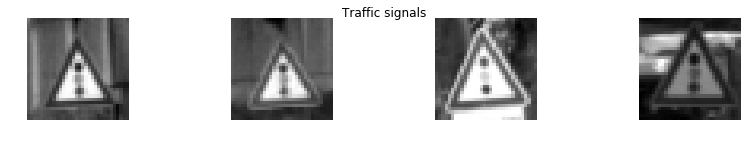

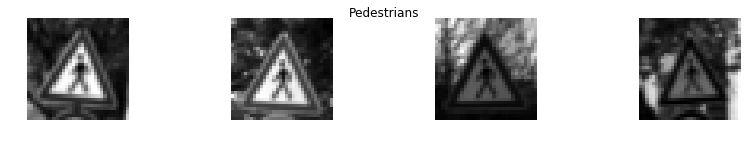

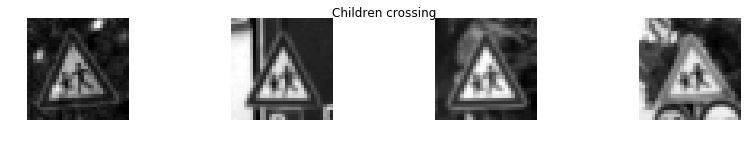

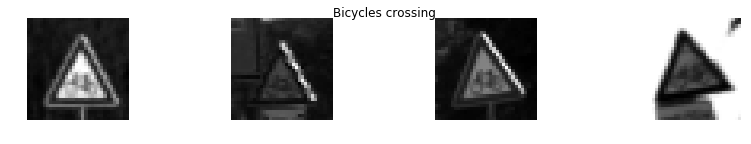

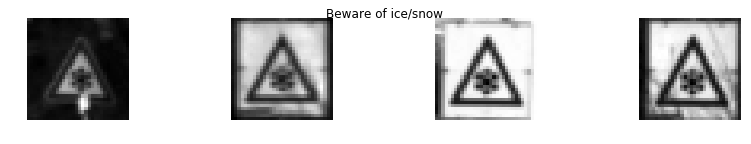

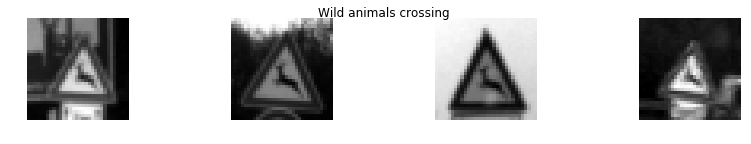

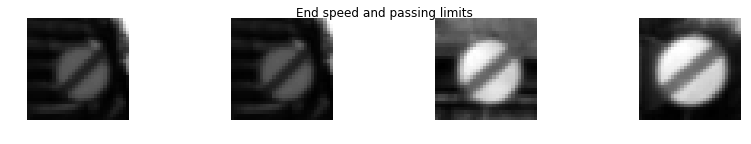

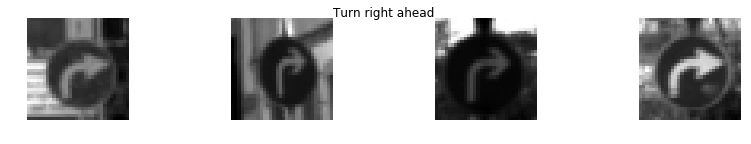

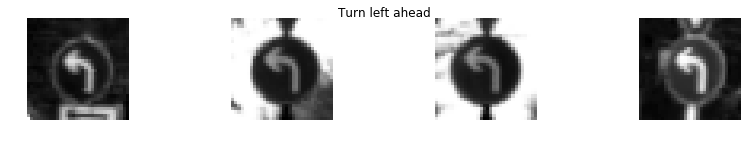

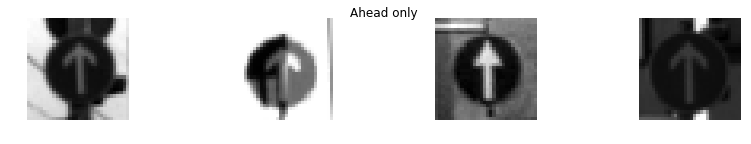

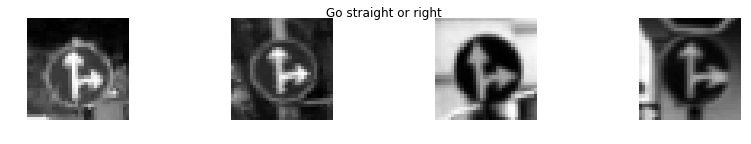

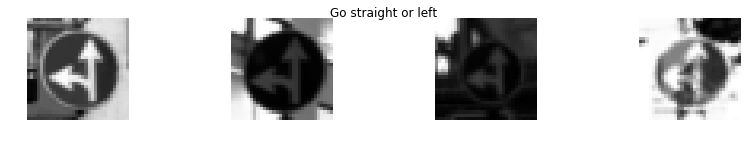

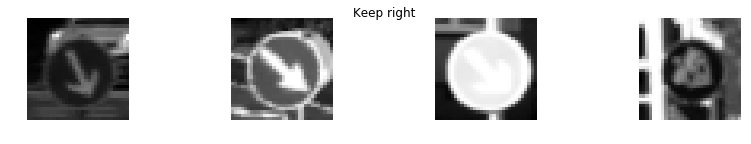

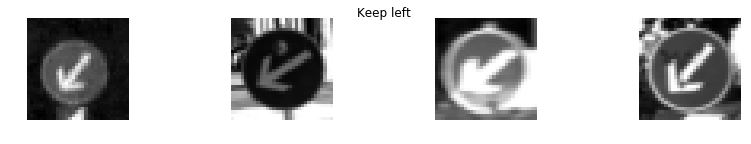

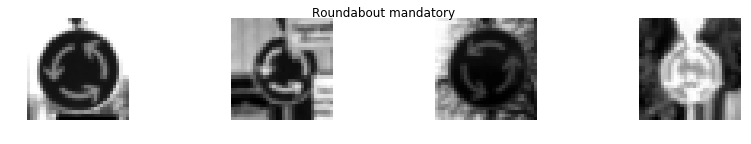

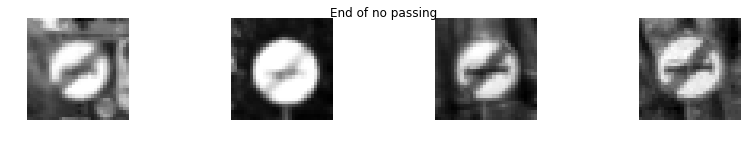

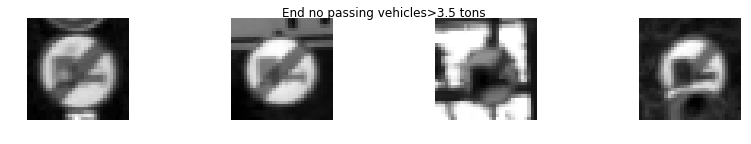

In [8]:
### Feel free to use as many code cells as needed.

plot_per_class = 4
for i in range(n_classes):
    figures = {}
    labels = {}
    class_els = (y_train == i)
    imgs_of_class = X_train[class_els]
    
    for j in range(plot_per_class):
        # choose random figures
        idx = np.random.randint(len(imgs_of_class))
        #labels[j] = '{}'.format(sign_dict[i])
        figures[j] = np.uint8(convertTo1Channel(imgs_of_class[idx])).squeeze()
    plot_figures(figures, 1, plot_per_class, supTitle=sign_dict[i])
plt.show()

### Model Architecture

In [6]:
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
act1 = None
act2 = None

def LeNet(x, n_channels, n_classes):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    global act1, act2
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    w_conv1 = tf.Variable(tf.truncated_normal((5,5,n_channels, 6), mu, sigma), name='w_conv1')
    bias1 = tf.Variable(tf.truncated_normal((6,)), name='b_conv1')
    conv1 = tf.nn.conv2d(x, w_conv1, strides=(1,1,1,1), padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bias1)
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)
    print("act1 expected 28,28,6, got: ", act1.shape)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(act1, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    #print("pool1 expected 14,14,6, got: ", pool1.shape)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    w_conv2 = tf.Variable(tf.truncated_normal((5,5,6,16), mu, sigma), name='w_conv2')
    bias2 = tf.Variable(tf.truncated_normal((16,)), name='b_conv2')
    conv2 = tf.nn.conv2d(pool1, w_conv2, strides=(1,1,1,1), padding='VALID')
    conv2 = tf.nn.bias_add(conv2, bias2)
    
    # TODO: Activation.
    act2 = tf.nn.relu(conv2)
    print("act2 expected 10,10,16, got:  ", act2.shape)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    #print("expected 5x5x16, ", act2.shape)
    pool2 = tf.nn.max_pool(act2, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    print("pool2 expected 5,5,16, got: ", pool2.shape)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(pool2)
    flat = tf.nn.dropout(flat, keep_prob)
    print("flat expected 400, got: ", flat.shape)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    w_full1 = tf.Variable(tf.truncated_normal((400,120), mu, sigma), name="w_full1")
    b_full1 = tf.Variable(tf.truncated_normal((120,), mu, sigma), name='b_full1')
    full1 = tf.add(tf.matmul(flat, w_full1), b_full1)
    # TODO: Activation.
    full1 = tf.nn.relu(full1)
    full1 = tf.nn.dropout(full1, keep_prob)
    print("full1 expected 120, got: ", full1.shape)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    w_full2 = tf.Variable(tf.truncated_normal((120,84), mu, sigma), name="w_full2")
    b_full2 = tf.Variable(tf.truncated_normal((84,), mu, sigma), name='b_full2')
    full2 = tf.add(tf.matmul(full1, w_full2), b_full2)
    # TODO: Activation.
    full2 = tf.nn.relu(full2)
    full2 = tf.nn.dropout(full2, keep_prob)
    print("full2 expected 84, got: ", full2.shape)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    w_full3 = tf.Variable(tf.truncated_normal((84,n_classes), mu, sigma), name="w_full3")
    b_full3 = tf.Variable(tf.truncated_normal((n_classes,), mu, sigma), name='b_full3')
    logits = tf.add(tf.matmul(full2, w_full3), b_full3)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
keep_prob = tf.placeholder(tf.float32)
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, n_channels, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        pred = sess.run(logits, feed_dict={x: batch_x, keep_prob: 1.})
        #for v in l:
        #    for l in v:
        #    print("{:.3f}".format(v), end=" ")
        #    print()
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
        #print(np.argmax(pred, 1))
    return total_accuracy / num_examples

act1 expected 28,28,6, got:  (?, 28, 28, 6)
act2 expected 10,10,16, got:   (?, 10, 10, 16)
pool2 expected 5,5,16, got:  (?, 5, 5, 16)
flat expected 400, got:  (?, 400)
full1 expected 120, got:  (?, 120)
full2 expected 84, got:  (?, 84)


In [57]:
EPOCHS = 45
for b in [128, 256]:
    for prob in [0.5, 0.6, 0.7]:
        for lr in np.exp(np.linspace(np.log(0.0001), np.log(0.001), 5)):
            print("batch size: {}, rate: {}, keep_prob: {}".format(b, lr, prob))
            rate = lr
            actual_keep_prob = prob
            BATCH_SIZE = b
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
            loss_operation = tf.reduce_mean(cross_entropy)
            optimizer = tf.train.AdamOptimizer(learning_rate = rate)
            training_operation = optimizer.minimize(loss_operation)

            #saver = tf.train.Saver()

            with tf.Session() as sess:

                sess.run(tf.global_variables_initializer())
                num_examples = len(X_train)

                print("Training...")
                print()
                for i in range(EPOCHS):
                    #if EPOCHS>0 and EPOCHS%10==0:
                    #    rate = rate/10;
                    X_train_t, y_train_t = shuffle(X_train_norm, y_train)
                    for offset in range(0, num_examples, BATCH_SIZE):
                        end = offset + BATCH_SIZE
                        batch_x, batch_y = X_train_t[offset:end], y_train_t[offset:end]
                        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: actual_keep_prob})

                    validation_accuracy = evaluate(X_val_norm, y_valid)
                    print("EPOCH {} ...".format(i+1))
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    print()

                #saver.save(sess, './lenet')
                print("==============================")
            

batch size: 128, rate: 0.00010000000000000009, keep_prob: 0.5
Training...

EPOCH 1 ...
Validation Accuracy = 0.065

EPOCH 2 ...
Validation Accuracy = 0.075

EPOCH 3 ...
Validation Accuracy = 0.090

EPOCH 4 ...
Validation Accuracy = 0.098

EPOCH 5 ...
Validation Accuracy = 0.102

EPOCH 6 ...
Validation Accuracy = 0.111

EPOCH 7 ...
Validation Accuracy = 0.119

EPOCH 8 ...
Validation Accuracy = 0.165

EPOCH 9 ...
Validation Accuracy = 0.228

EPOCH 10 ...
Validation Accuracy = 0.256

EPOCH 11 ...
Validation Accuracy = 0.300

EPOCH 12 ...
Validation Accuracy = 0.353

EPOCH 13 ...
Validation Accuracy = 0.385

EPOCH 14 ...
Validation Accuracy = 0.421

EPOCH 15 ...
Validation Accuracy = 0.454

EPOCH 16 ...
Validation Accuracy = 0.479

EPOCH 17 ...
Validation Accuracy = 0.500

EPOCH 18 ...
Validation Accuracy = 0.520

EPOCH 19 ...
Validation Accuracy = 0.540

EPOCH 20 ...
Validation Accuracy = 0.556

EPOCH 21 ...
Validation Accuracy = 0.573

EPOCH 22 ...
Validation Accuracy = 0.585

EPOCH 23 .

EPOCH 6 ...
Validation Accuracy = 0.776

EPOCH 7 ...
Validation Accuracy = 0.812

EPOCH 8 ...
Validation Accuracy = 0.839

EPOCH 9 ...
Validation Accuracy = 0.843

EPOCH 10 ...
Validation Accuracy = 0.845

EPOCH 11 ...
Validation Accuracy = 0.862

EPOCH 12 ...
Validation Accuracy = 0.868

EPOCH 13 ...
Validation Accuracy = 0.872

EPOCH 14 ...
Validation Accuracy = 0.872

EPOCH 15 ...
Validation Accuracy = 0.893

EPOCH 16 ...
Validation Accuracy = 0.896

EPOCH 17 ...
Validation Accuracy = 0.892

EPOCH 18 ...
Validation Accuracy = 0.899

EPOCH 19 ...
Validation Accuracy = 0.905

EPOCH 20 ...
Validation Accuracy = 0.925

EPOCH 21 ...
Validation Accuracy = 0.914

EPOCH 22 ...
Validation Accuracy = 0.921

EPOCH 23 ...
Validation Accuracy = 0.918

EPOCH 24 ...
Validation Accuracy = 0.928

EPOCH 25 ...
Validation Accuracy = 0.936

EPOCH 26 ...
Validation Accuracy = 0.931

EPOCH 27 ...
Validation Accuracy = 0.927

EPOCH 28 ...
Validation Accuracy = 0.929

EPOCH 29 ...
Validation Accuracy = 0.9

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.872

EPOCH 14 ...
Validation Accuracy = 0.872

EPOCH 15 ...
Validation Accuracy = 0.884

EPOCH 16 ...
Validation Accuracy = 0.881

EPOCH 17 ...
Validation Accuracy = 0.887

EPOCH 18 ...
Validation Accuracy = 0.887

EPOCH 19 ...
Validation Accuracy = 0.895

EPOCH 20 ...
Validation Accuracy = 0.897

EPOCH 21 ...
Validation Accuracy = 0.901

EPOCH 22 ...
Validation Accuracy = 0.903

EPOCH 23 ...
Validation Accuracy = 0.905

EPOCH 24 ...
Validation Accuracy = 0.911

EPOCH 25 ...
Validation Accuracy = 0.911

EPOCH 26 ...
Validation Accuracy = 0.912

EPOCH 27 ...
Validation Accuracy = 0.912

EPOCH 28 ...
Validation Accuracy = 0.916

EPOCH 29 ...
Validation Accuracy = 0.916

EPOCH 30 ...
Validation Accuracy = 0.923

EPOCH 31 ...
Validation Accuracy = 0.924

EPOCH 32 ...
Validation Accuracy = 0.922

EPOCH 33 ...
Validation Accuracy = 0.927

EPOCH 34 ...
Validation Accuracy = 0.929

EPOCH 35 ...
Validation Accuracy =

EPOCH 18 ...
Validation Accuracy = 0.892

EPOCH 19 ...
Validation Accuracy = 0.896

EPOCH 20 ...
Validation Accuracy = 0.895

EPOCH 21 ...
Validation Accuracy = 0.893

EPOCH 22 ...
Validation Accuracy = 0.893

EPOCH 23 ...
Validation Accuracy = 0.907

EPOCH 24 ...
Validation Accuracy = 0.902

EPOCH 25 ...
Validation Accuracy = 0.904

EPOCH 26 ...
Validation Accuracy = 0.913

EPOCH 27 ...
Validation Accuracy = 0.913

EPOCH 28 ...
Validation Accuracy = 0.919

EPOCH 29 ...
Validation Accuracy = 0.915

EPOCH 30 ...
Validation Accuracy = 0.919

EPOCH 31 ...
Validation Accuracy = 0.920

EPOCH 32 ...
Validation Accuracy = 0.912

EPOCH 33 ...
Validation Accuracy = 0.923

EPOCH 34 ...
Validation Accuracy = 0.922

EPOCH 35 ...
Validation Accuracy = 0.922

EPOCH 36 ...
Validation Accuracy = 0.931

EPOCH 37 ...
Validation Accuracy = 0.921

EPOCH 38 ...
Validation Accuracy = 0.921

EPOCH 39 ...
Validation Accuracy = 0.929

EPOCH 40 ...
Validation Accuracy = 0.928

EPOCH 41 ...
Validation Accuracy =

EPOCH 24 ...
Validation Accuracy = 0.624

EPOCH 25 ...
Validation Accuracy = 0.623

EPOCH 26 ...
Validation Accuracy = 0.629

EPOCH 27 ...
Validation Accuracy = 0.650

EPOCH 28 ...
Validation Accuracy = 0.657

EPOCH 29 ...
Validation Accuracy = 0.662

EPOCH 30 ...
Validation Accuracy = 0.669

EPOCH 31 ...
Validation Accuracy = 0.671

EPOCH 32 ...
Validation Accuracy = 0.688

EPOCH 33 ...
Validation Accuracy = 0.695

EPOCH 34 ...
Validation Accuracy = 0.703

EPOCH 35 ...
Validation Accuracy = 0.706

EPOCH 36 ...
Validation Accuracy = 0.716

EPOCH 37 ...
Validation Accuracy = 0.721

EPOCH 38 ...
Validation Accuracy = 0.726

EPOCH 39 ...
Validation Accuracy = 0.736

EPOCH 40 ...
Validation Accuracy = 0.739

EPOCH 41 ...
Validation Accuracy = 0.741

EPOCH 42 ...
Validation Accuracy = 0.748

EPOCH 43 ...
Validation Accuracy = 0.750

EPOCH 44 ...
Validation Accuracy = 0.764

EPOCH 45 ...
Validation Accuracy = 0.768

batch size: 256, rate: 0.0003162277660168384, keep_prob: 0.5
Training...

EP

EPOCH 30 ...
Validation Accuracy = 0.710

EPOCH 31 ...
Validation Accuracy = 0.721

EPOCH 32 ...
Validation Accuracy = 0.733

EPOCH 33 ...
Validation Accuracy = 0.741

EPOCH 34 ...
Validation Accuracy = 0.745

EPOCH 35 ...
Validation Accuracy = 0.754

EPOCH 36 ...
Validation Accuracy = 0.754

EPOCH 37 ...
Validation Accuracy = 0.762

EPOCH 38 ...
Validation Accuracy = 0.767

EPOCH 39 ...
Validation Accuracy = 0.774

EPOCH 40 ...
Validation Accuracy = 0.779

EPOCH 41 ...
Validation Accuracy = 0.780

EPOCH 42 ...
Validation Accuracy = 0.783

EPOCH 43 ...
Validation Accuracy = 0.791

EPOCH 44 ...
Validation Accuracy = 0.793

EPOCH 45 ...
Validation Accuracy = 0.799

batch size: 256, rate: 0.00017782794100389232, keep_prob: 0.6
Training...

EPOCH 1 ...
Validation Accuracy = 0.063

EPOCH 2 ...
Validation Accuracy = 0.078

EPOCH 3 ...
Validation Accuracy = 0.102

EPOCH 4 ...
Validation Accuracy = 0.139

EPOCH 5 ...
Validation Accuracy = 0.194

EPOCH 6 ...
Validation Accuracy = 0.245

EPOCH 7

EPOCH 36 ...
Validation Accuracy = 0.936

EPOCH 37 ...
Validation Accuracy = 0.938

EPOCH 38 ...
Validation Accuracy = 0.934

EPOCH 39 ...
Validation Accuracy = 0.937

EPOCH 40 ...
Validation Accuracy = 0.941

EPOCH 41 ...
Validation Accuracy = 0.941

EPOCH 42 ...
Validation Accuracy = 0.941

EPOCH 43 ...
Validation Accuracy = 0.947

EPOCH 44 ...
Validation Accuracy = 0.944

EPOCH 45 ...
Validation Accuracy = 0.940

batch size: 256, rate: 0.00010000000000000009, keep_prob: 0.7
Training...

EPOCH 1 ...
Validation Accuracy = 0.054

EPOCH 2 ...
Validation Accuracy = 0.064

EPOCH 3 ...
Validation Accuracy = 0.079

EPOCH 4 ...
Validation Accuracy = 0.093

EPOCH 5 ...
Validation Accuracy = 0.102

EPOCH 6 ...
Validation Accuracy = 0.126

EPOCH 7 ...
Validation Accuracy = 0.151

EPOCH 8 ...
Validation Accuracy = 0.203

EPOCH 9 ...
Validation Accuracy = 0.253

EPOCH 10 ...
Validation Accuracy = 0.295

EPOCH 11 ...
Validation Accuracy = 0.357

EPOCH 12 ...
Validation Accuracy = 0.412

EPOCH 13 .

EPOCH 42 ...
Validation Accuracy = 0.925

EPOCH 43 ...
Validation Accuracy = 0.932

EPOCH 44 ...
Validation Accuracy = 0.925

EPOCH 45 ...
Validation Accuracy = 0.936

batch size: 256, rate: 0.0010000000000000002, keep_prob: 0.7
Training...

EPOCH 1 ...
Validation Accuracy = 0.244

EPOCH 2 ...
Validation Accuracy = 0.586

EPOCH 3 ...
Validation Accuracy = 0.707

EPOCH 4 ...
Validation Accuracy = 0.744

EPOCH 5 ...
Validation Accuracy = 0.783

EPOCH 6 ...
Validation Accuracy = 0.810

EPOCH 7 ...
Validation Accuracy = 0.842

EPOCH 8 ...
Validation Accuracy = 0.850

EPOCH 9 ...
Validation Accuracy = 0.869

EPOCH 10 ...
Validation Accuracy = 0.872

EPOCH 11 ...
Validation Accuracy = 0.879

EPOCH 12 ...
Validation Accuracy = 0.886

EPOCH 13 ...
Validation Accuracy = 0.887

EPOCH 14 ...
Validation Accuracy = 0.903

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.913

EPOCH 17 ...
Validation Accuracy = 0.913

EPOCH 18 ...
Validation Accuracy = 0.910

EPOCH 19 ..

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 45
rate = 0.00055
actual_keep_prob = 0.7
BATCH_SIZE = 128
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #if EPOCHS>0 and EPOCHS%10==0:
        #    rate = rate/10;
        X_train_t, y_train_t = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_t[offset:end], y_train_t[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: actual_keep_prob})
            
        validation_accuracy = evaluate(X_val_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.271

EPOCH 2 ...
Validation Accuracy = 0.562

EPOCH 3 ...
Validation Accuracy = 0.696

EPOCH 4 ...
Validation Accuracy = 0.755

EPOCH 5 ...
Validation Accuracy = 0.785

EPOCH 6 ...
Validation Accuracy = 0.820

EPOCH 7 ...
Validation Accuracy = 0.832

EPOCH 8 ...
Validation Accuracy = 0.841

EPOCH 9 ...
Validation Accuracy = 0.868

EPOCH 10 ...
Validation Accuracy = 0.864

EPOCH 11 ...
Validation Accuracy = 0.891

EPOCH 12 ...
Validation Accuracy = 0.890

EPOCH 13 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.901

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.917

EPOCH 17 ...
Validation Accuracy = 0.913

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.919

EPOCH 20 ...
Validation Accuracy = 0.922

EPOCH 21 ...
Validation Accuracy = 0.920

EPOCH 22 ...
Validation Accuracy = 0.919

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 24 ...
Validation Accura

# Training accuracy

In [19]:
saver = tf.train.Saver()

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet'))
    
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X_train_norm, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.994


# Validation accuracy

In [20]:
saver = tf.train.Saver()

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet'))
    
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X_val_norm, y_valid)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.946


# Test accuracy

In [18]:
saver = tf.train.Saver()

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet'))
    
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.929


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Load the images and plot them here.
!wget https://thumbs.dreamstime.com/z/road-signs-mountain-warning-sign-slippery-surface-mandatory-snow-chains-obligatory-plate-icing-rules-traffic-code-169992410.jpg
!wget https://thumbs.dreamstime.com/z/hiker-walking-along-mountain-road-sign-wild-animals-traffic-signal-indicating-danger-crossing-wildlife-woman-backpack-to-62108546.jpg
!wget https://thumbs.dreamstime.com/z/warning-signs-mountain-road-danger-sign-collapse-right-mountain-road-123992928.jpg
!wget https://thumbs.dreamstime.com/z/signs-danger-wild-animals-landslide-mountains-road-warning-mountain-124062933.jpg
    
### Feel free to use as many code cells as needed.

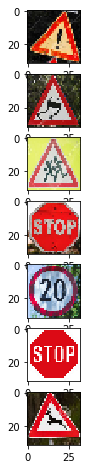

In [11]:
path = "webSigns"
outpath = os.path.join(path,'resized')

imgs = [el for el in os.listdir(path) if el.endswith(".jpg") ]


if not os.path.isdir(outpath): os.mkdir(outpath)

fig,ax = plt.subplots(len(imgs), figsize=(10,8))
for i, el in enumerate(imgs):
    img_path = os.path.join(path, el)
    img = plt.imread(img_path)
    res_img = Image.fromarray(cv2.resize(img, (32,32)))
    #print(img.getbands(), "--->", res_img.getbands())
    ax[i].imshow(res_img)
    res_img.save(os.path.join(outpath, el))

for el in imgs:
    jj = plt.imread(os.path.join(outpath, el))
    ii = Image.fromarray(plt.imread(os.path.join(outpath, el)))
    #print(jj.shape, ii.getbands())
    

### Predict the Sign Type for Each Image

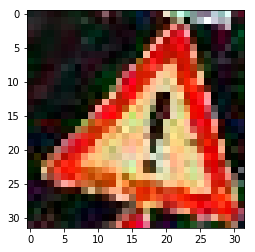

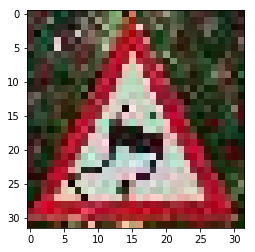

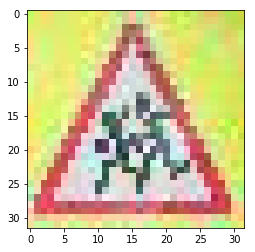

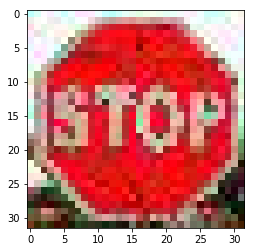

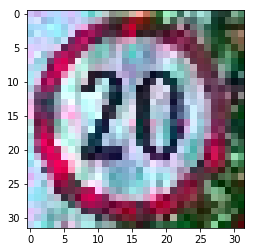

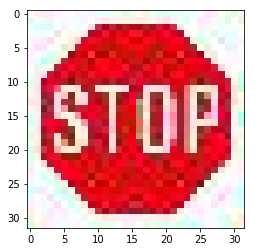

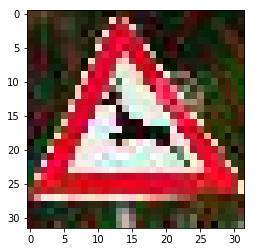

(7, 32, 32, 1)


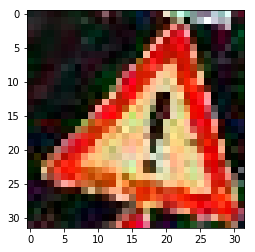

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
path = "webSigns"
outpath = os.path.join(path,'resized')
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))

#n_classes = 43
# [Variable and model creation goes here.]
#logits = LeNet(x)
saver = tf.train.Saver()  # Gets all variables in `graph
#saver = tf.train.import_meta_graph('lenet.meta')
web_imgs = list()
for el in os.listdir(outpath):
    if not el.endswith(".jpg"):
        continue
    
    img_path = os.path.join(outpath, el)
    fig, ax = plt.subplots()
    
    img = plt.imread(img_path)
    ax.imshow(img)
    web_imgs.append(img)
    #img = np.expand_dims(img, axis=0)
    #print(img.shape)
plt.show()
web_imgs = np.array(web_imgs)
web_imgs_norm = input_pipeline(np.array(web_imgs, dtype=np.float32))
#print("Classes: ", y_web.tolist())
print(web_imgs_norm.shape)
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
plt.imshow(web_imgs[0])

In [15]:
y_web = np.array([18, 23, 28, 14, 0, 14, 31])

In [16]:

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    web_accuracy = evaluate(web_imgs_norm, y_web)
    
    print("Web test-set accuracy = {:.3f}".format(web_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Web test-set accuracy = 0.286


### Test on other students' images

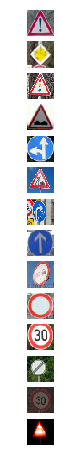

In [22]:
path = "OtherStudentsImgs/"
outpath = os.path.join(path,'resized')

imgs = [el for el in os.listdir(path) if el.endswith(".jpg") ]


if not os.path.isdir(outpath): os.mkdir(outpath)

fig,ax = plt.subplots(len(imgs), figsize=(10,8))

for i, el in enumerate(imgs):
    img_path = os.path.join(path, el)
    img = plt.imread(img_path)
    res_img = Image.fromarray(cv2.resize(img, (32,32)))
    #print(img.getbands(), "--->", res_img.getbands())
    ax[i].imshow(res_img)
    ax[i].axis('off')
    res_img.save(os.path.join(outpath, el))


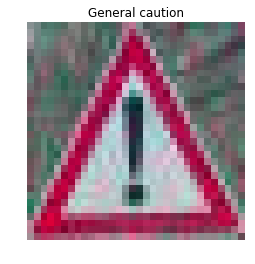

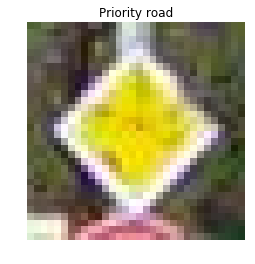

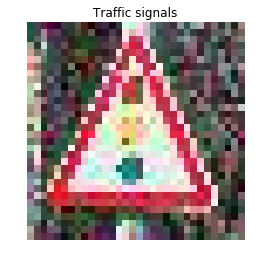

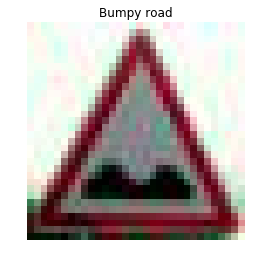

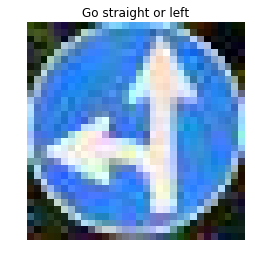

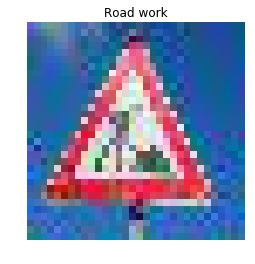

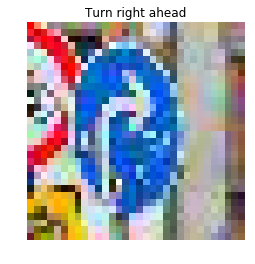

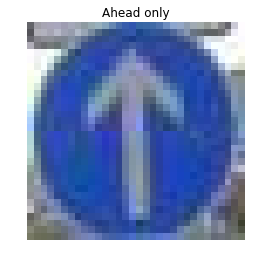

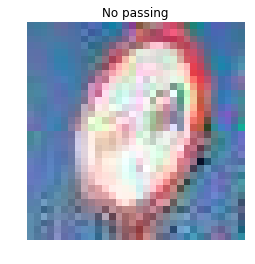

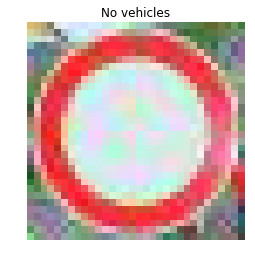

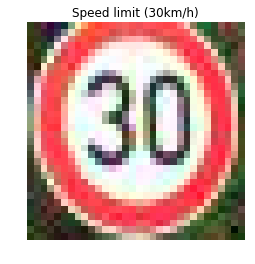

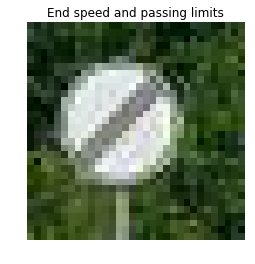

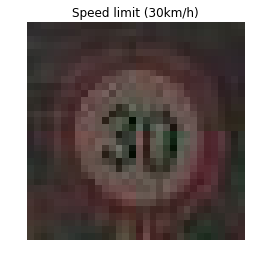

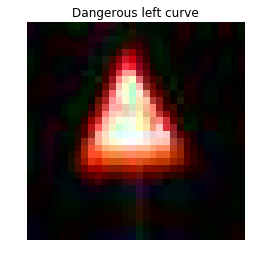

(14, 32, 32, 3)


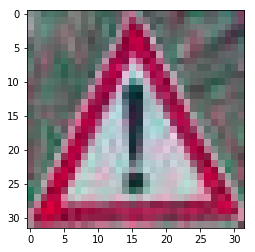

In [24]:
y_others = np.array([18, 12, 26, 22, 37, 25, 33, 35, 9, 15, 1, 32, 1, 19], dtype=np.float32)
other_imgs = list()

for i, el in enumerate(os.listdir(outpath)):
    if not el.endswith(".jpg"):
        continue
    
    img_path = os.path.join(outpath, el)
    fig, ax = plt.subplots()
    
    img = plt.imread(img_path)
    ax.imshow(img)
    #ax.set_title(sign_names[0])
    ax.set_title(sign_dict[int(y_others[i])])
    ax.axis('off')
    other_imgs.append(img)
    #img = np.expand_dims(img, axis=0)
    #print(img.shape)
plt.show()
other_imgs = np.array(other_imgs)
other_imgs_norm = input_pipeline(np.array(other_imgs, dtype=np.float32))
#print("Classes: ", y_web.tolist())
print(other_imgs.shape)
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
plt.imshow(other_imgs[0])

In [25]:

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    web_accuracy = evaluate(other_imgs_norm, y_others)
    
    print("Web test-set accuracy = {:.3f}".format(web_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Web test-set accuracy = 0.643


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


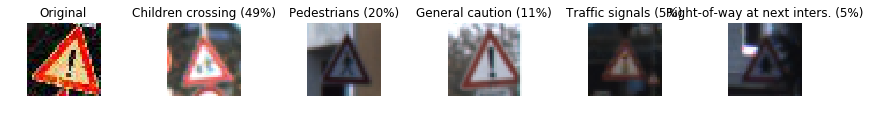

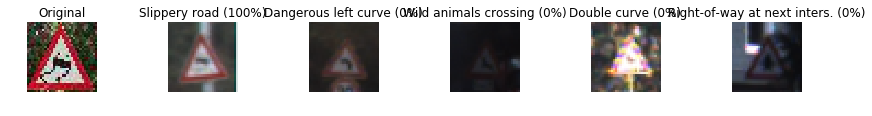

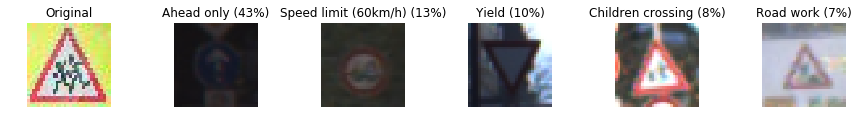

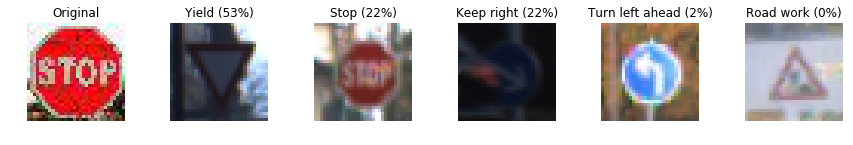

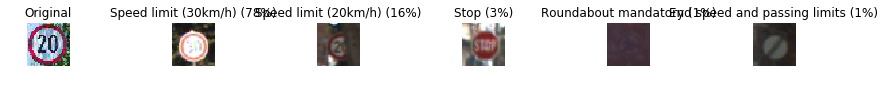

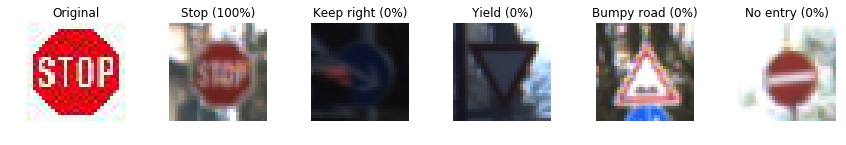

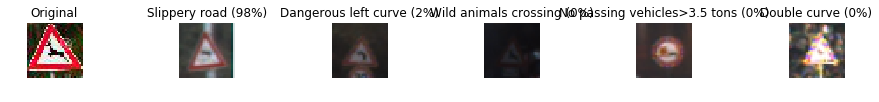

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
#y = tf.placeholder(tf.int32, (None))
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: web_imgs_norm, keep_prob: 1.})
    my_top_k = sess.run(top_k, feed_dict={x: web_imgs_norm, keep_prob: 1.})

    for i in range(web_imgs_norm.shape[0]):
        figures = {}
        labels = {}
        
        figures[0] = web_imgs[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = '{} ({:.0f}%)'.format(sign_dict[y_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]][0]], 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
        plot_figures(figures, 1, k_size+1, labels)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


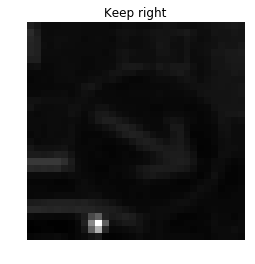

INFO:tensorflow:Restoring parameters from ./lenet
Model loaded.



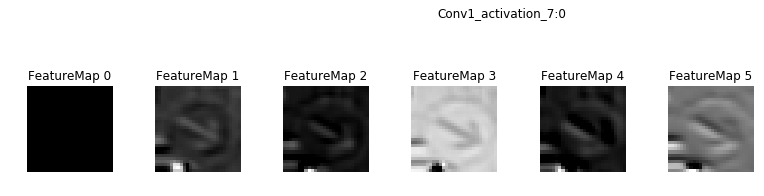

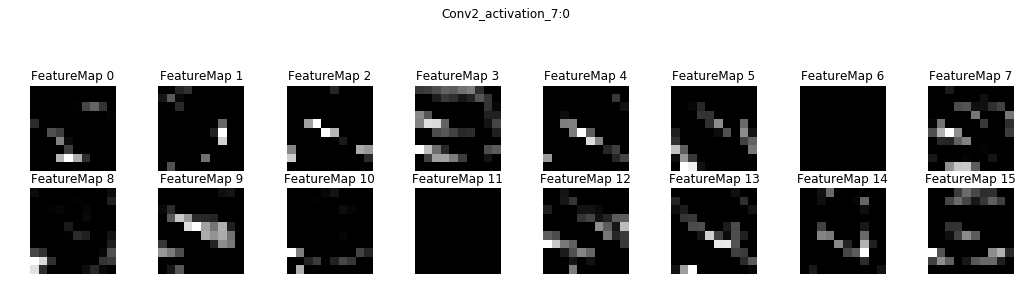

In [32]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = input_pipeline(np.array([image_input], dtype=np.float32))
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1.})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(18,11))
    plt.suptitle(tf_activation.name)
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


np.random.seed(42)
idx = np.random.randint(len(X_train))         
saver = tf.train.Saver()
plt.imshow(np.squeeze(np.uint8(convertTo1Channel(X_train[idx])), axis=2), cmap='gray')
plt.axis('off')
plt.title(sign_dict[y_train[idx]])
plt.show()
with tf.Session() as sess:
    #print(input_pipeline(np.array([X_train[0]], dtype=np.float32)).shape)
    saver.restore(sess, "./lenet")
    print("Model loaded.")

    print()
    #print(sign_dict[y_train[idx]])
    #print(np.uint8(convertTo1Channel(X_train[idx])).shape)
    act1_cp = tf.identity(act1, name="Conv1_activation")
    act2_cp = tf.identity(act2, name="Conv2_activation")
    outputFeatureMap(X_train[idx], act1_cp)
    outputFeatureMap(X_train[idx], act2_cp, plt_num=2)



In [17]:
t = tf.identity(act1, name="pippo")

In [19]:
k =tf.identity(act1, name="Conv1_activation")